In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import numpy as np

In [9]:
import warnings
warnings.filterwarnings("ignore")


In [10]:
data = pd.read_csv("C:/Users/Medhansh Jindal/Downloads/tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
data["sex"] = LabelEncoder().fit_transform(data["sex"])
data["smoker"] = LabelEncoder().fit_transform(data["smoker"])
data["day"] = LabelEncoder().fit_transform(data["day"])
data["time"] = LabelEncoder().fit_transform(data["time"])

In [12]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


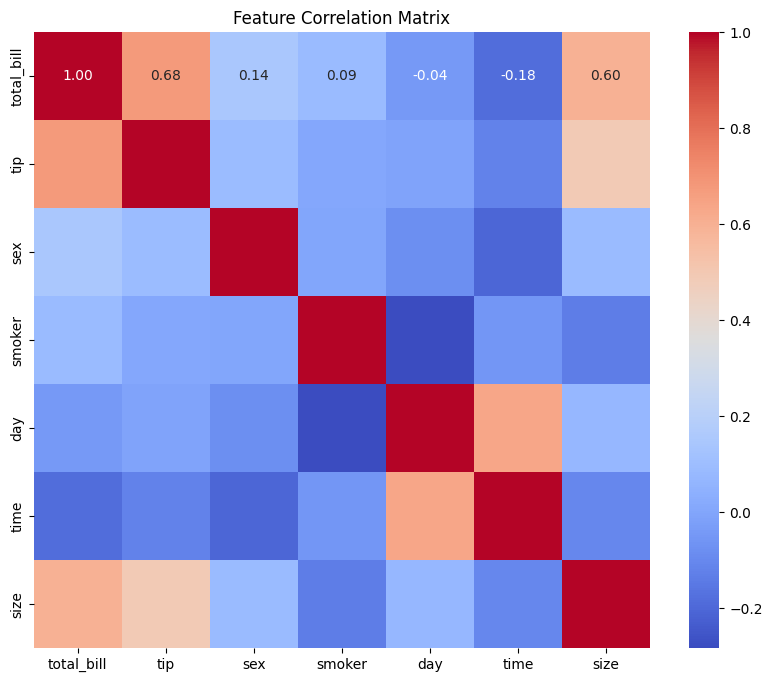

In [13]:
correlation_matrix = data.corr()

# Step 4: Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

We see that maximum correlation is either between tip and Total bill or day and time 

We see that day & time doesnot affect the tipping behaviour.
Hence, we now perform our analysis on other features as predictors because we have here received a low R2 score and irrelevant features do affect the R2 score.. 

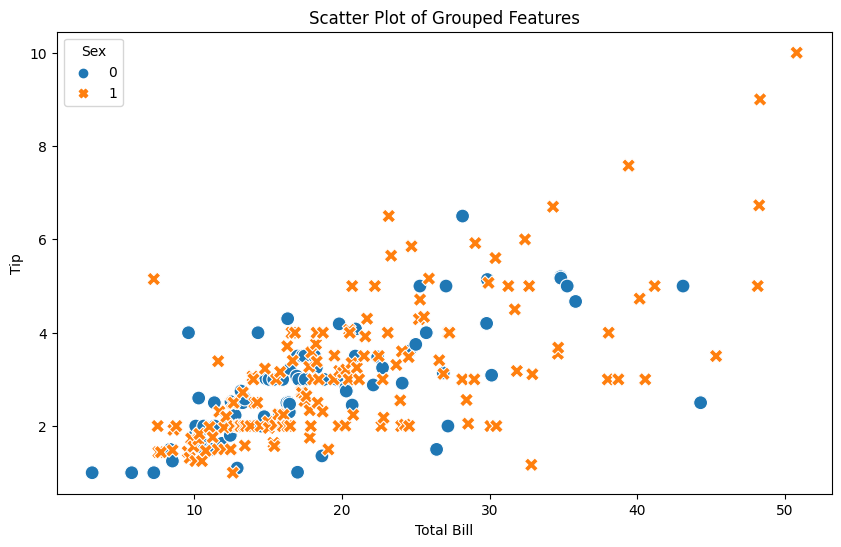

In [14]:
grouped_df = data.groupby(['sex', 'total_bill']).mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='total_bill', y='tip', hue='sex', style='sex', s=100)
plt.title("Scatter Plot of Grouped Features")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Sex")
plt.show()

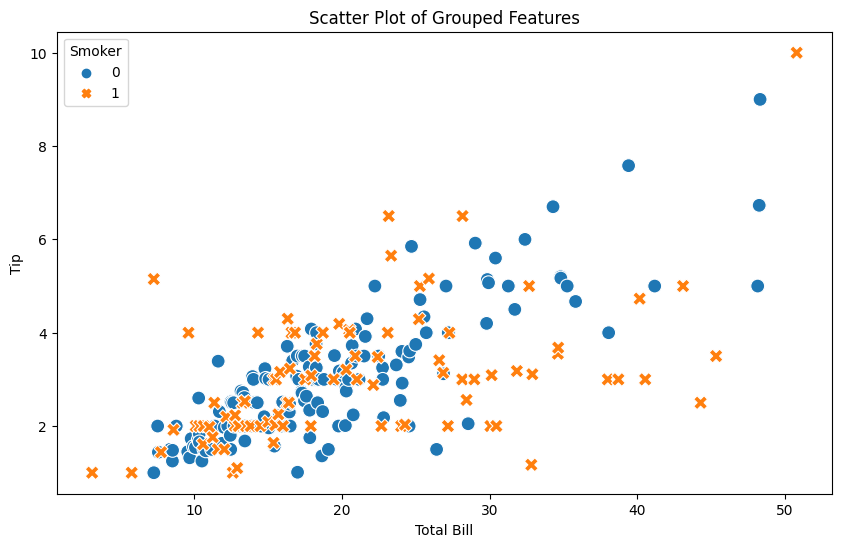

In [15]:
grouped_df = data.groupby(['smoker', 'total_bill']).mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='total_bill', y='tip', hue='smoker', style='smoker', s=100)
plt.title("Scatter Plot of Grouped Features")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Smoker")
plt.show()

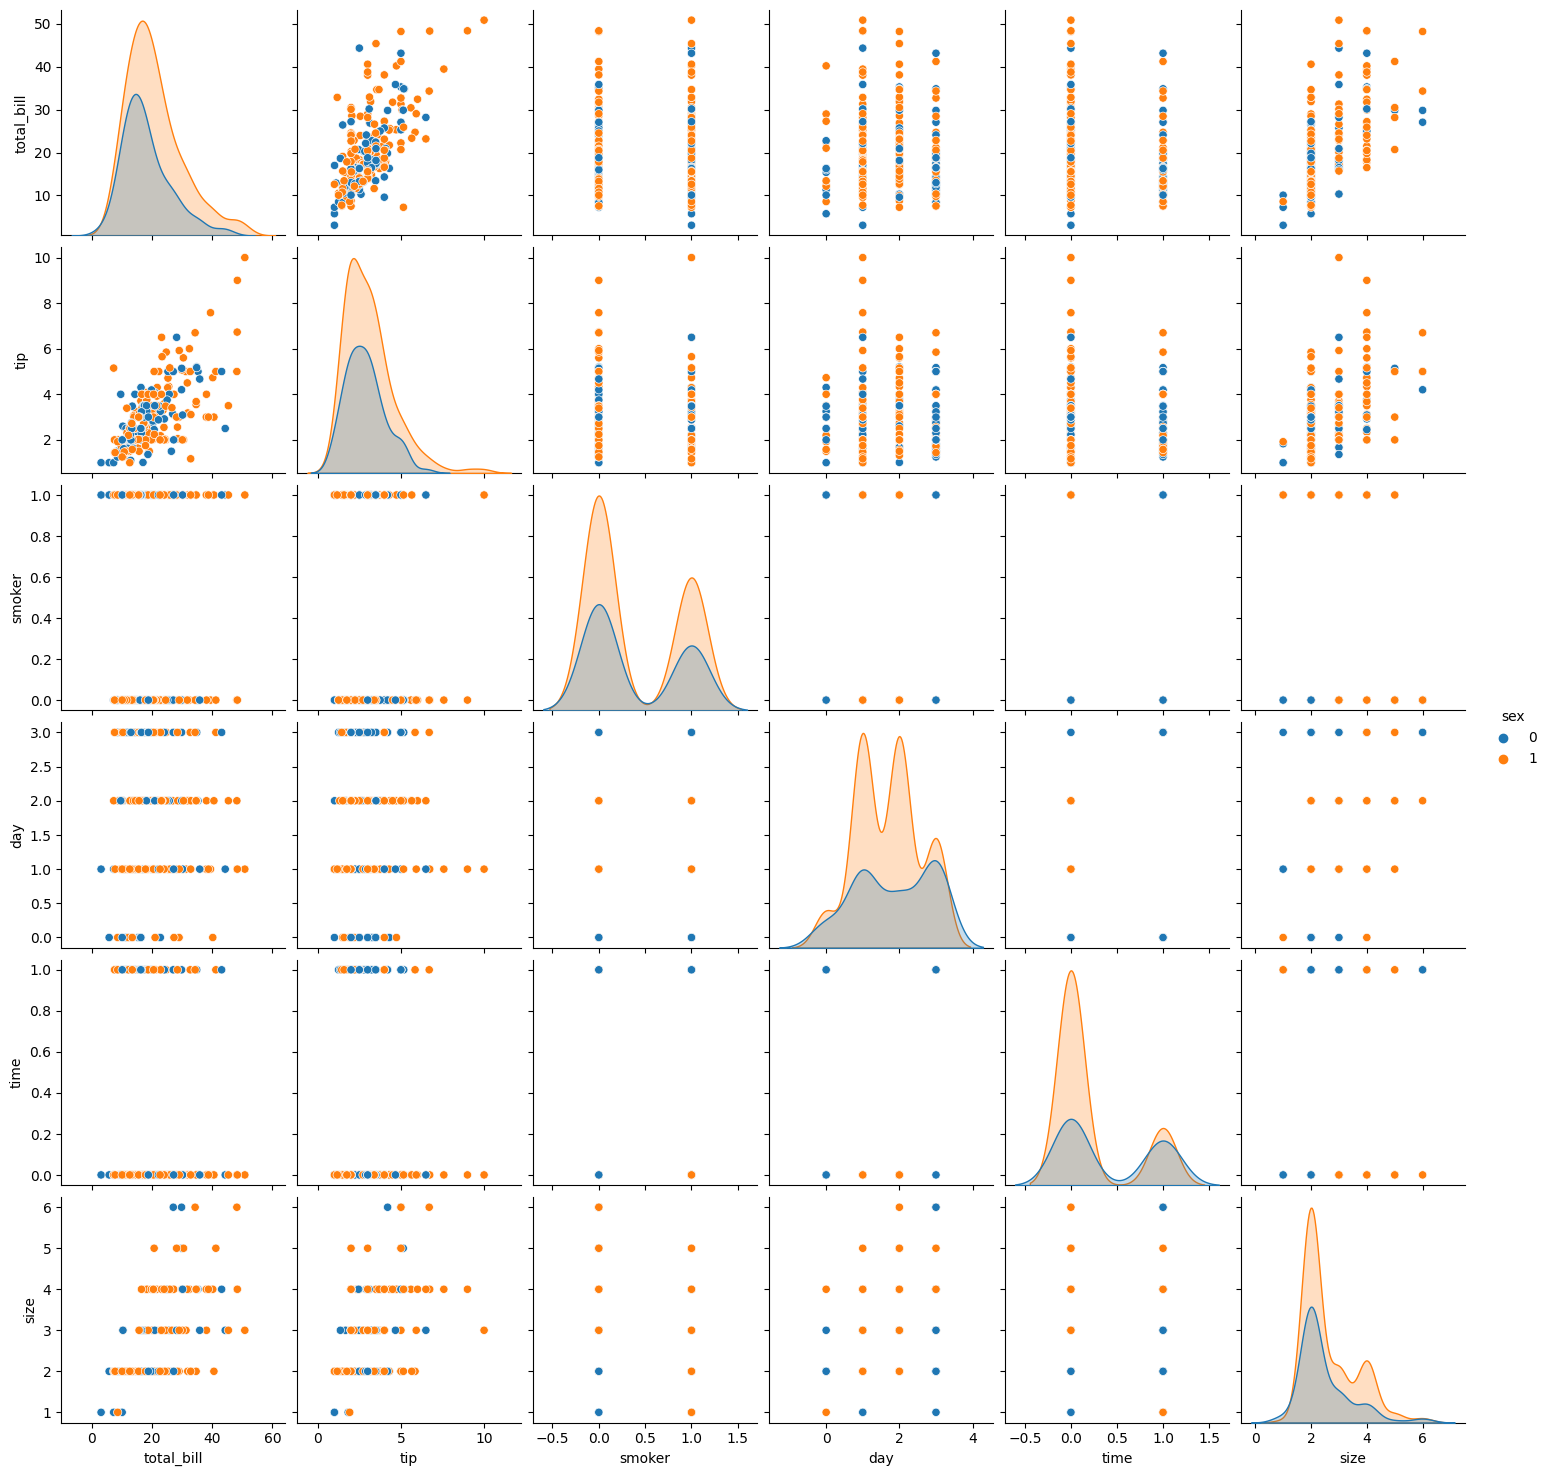

In [16]:
sns.pairplot(data=data, hue='sex')
plt.show()

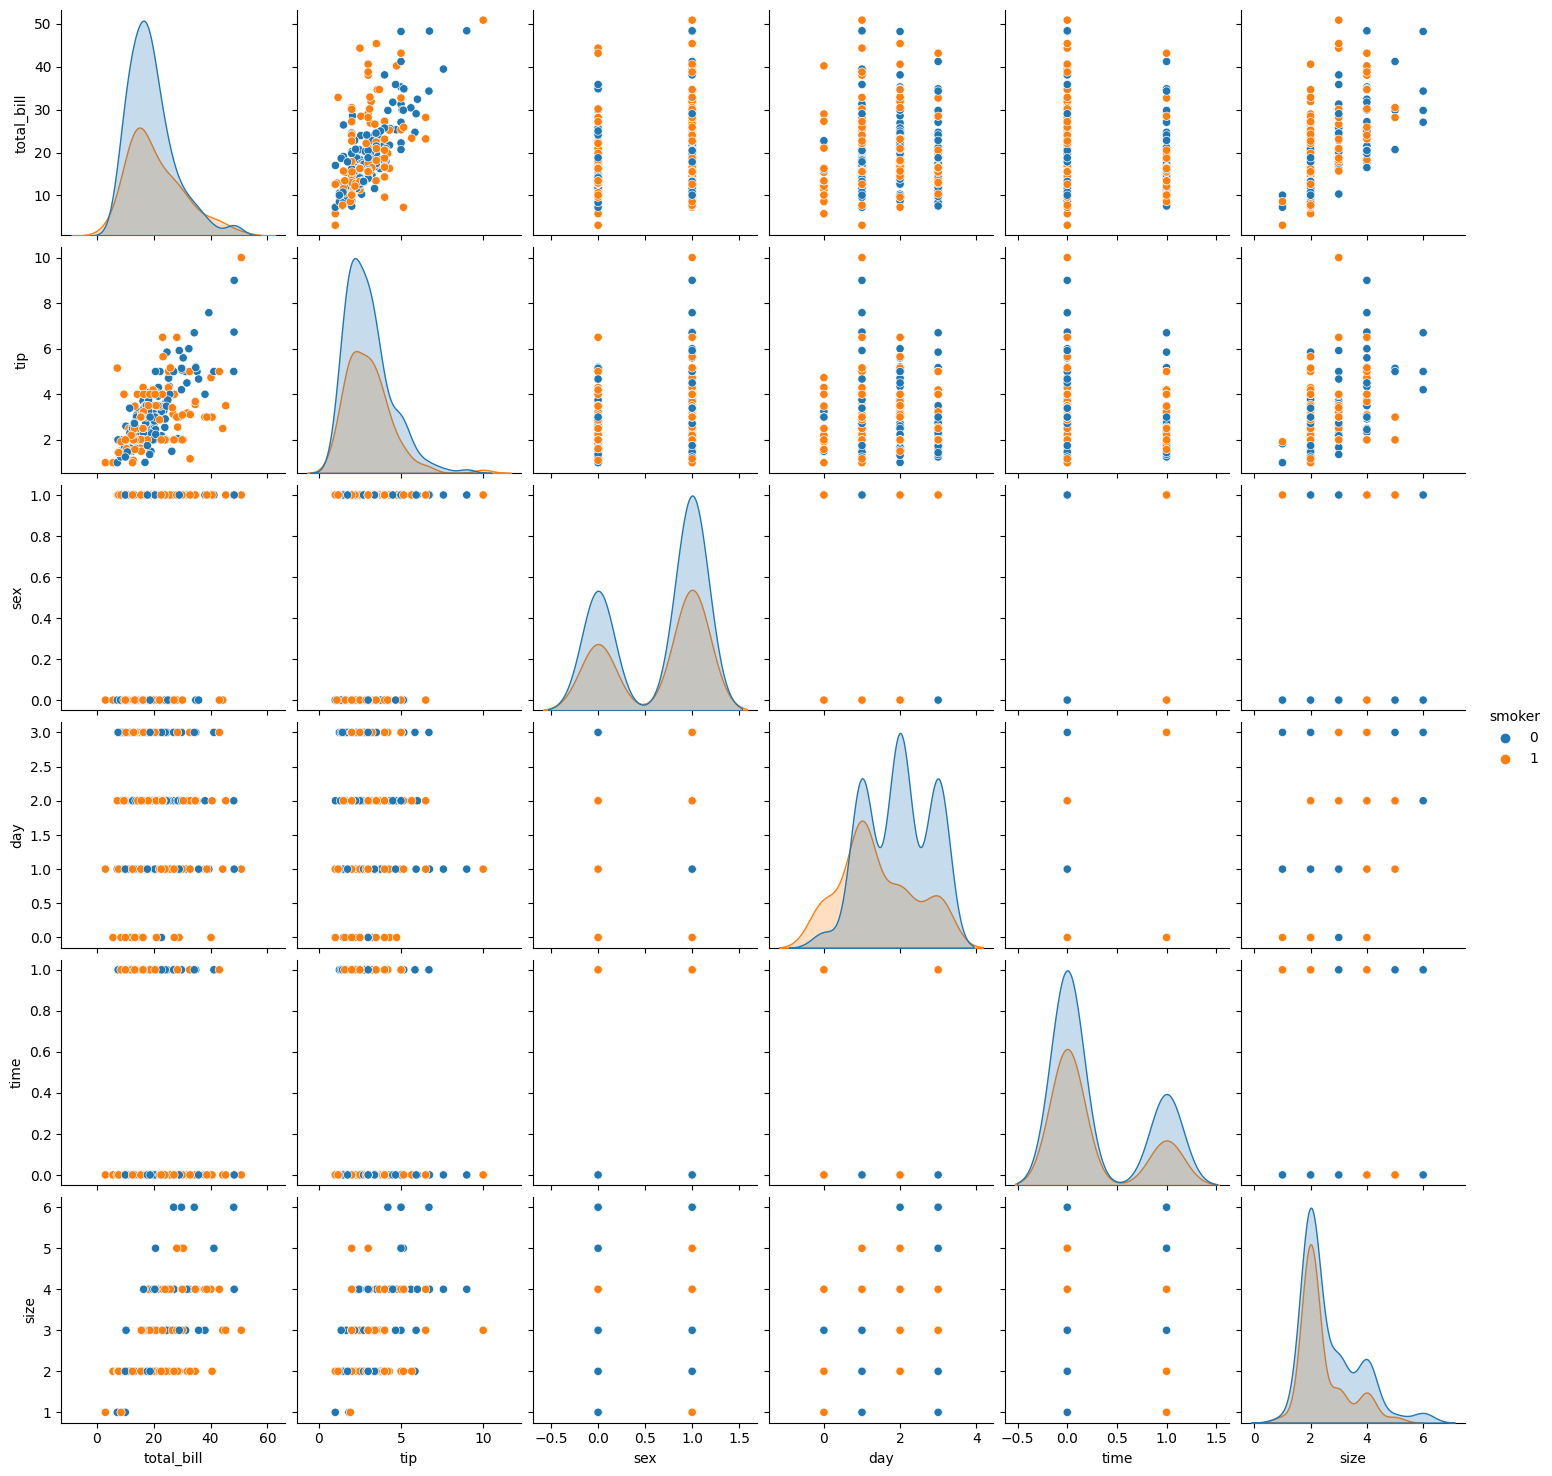

In [17]:
sns.pairplot(data=data, hue='smoker')
plt.show()

We see that day, time doesn't affect the tipping behaviour 

In [20]:
New_data = data.drop(["day","time"],axis=1)

In [21]:
New_data

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,0,2
1,10.34,1.66,1,0,3
2,21.01,3.50,1,0,3
3,23.68,3.31,1,0,2
4,24.59,3.61,0,0,4
...,...,...,...,...,...
239,29.03,5.92,1,0,3
240,27.18,2.00,0,1,2
241,22.67,2.00,1,1,2
242,17.82,1.75,1,0,2


In [22]:
new_correlation_matrix = New_data.corr()


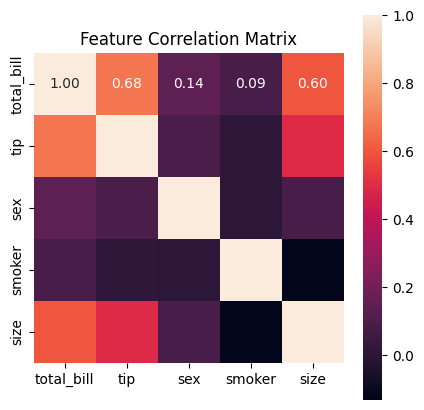

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(new_correlation_matrix, annot=True, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

<Figure size 500x500 with 0 Axes>

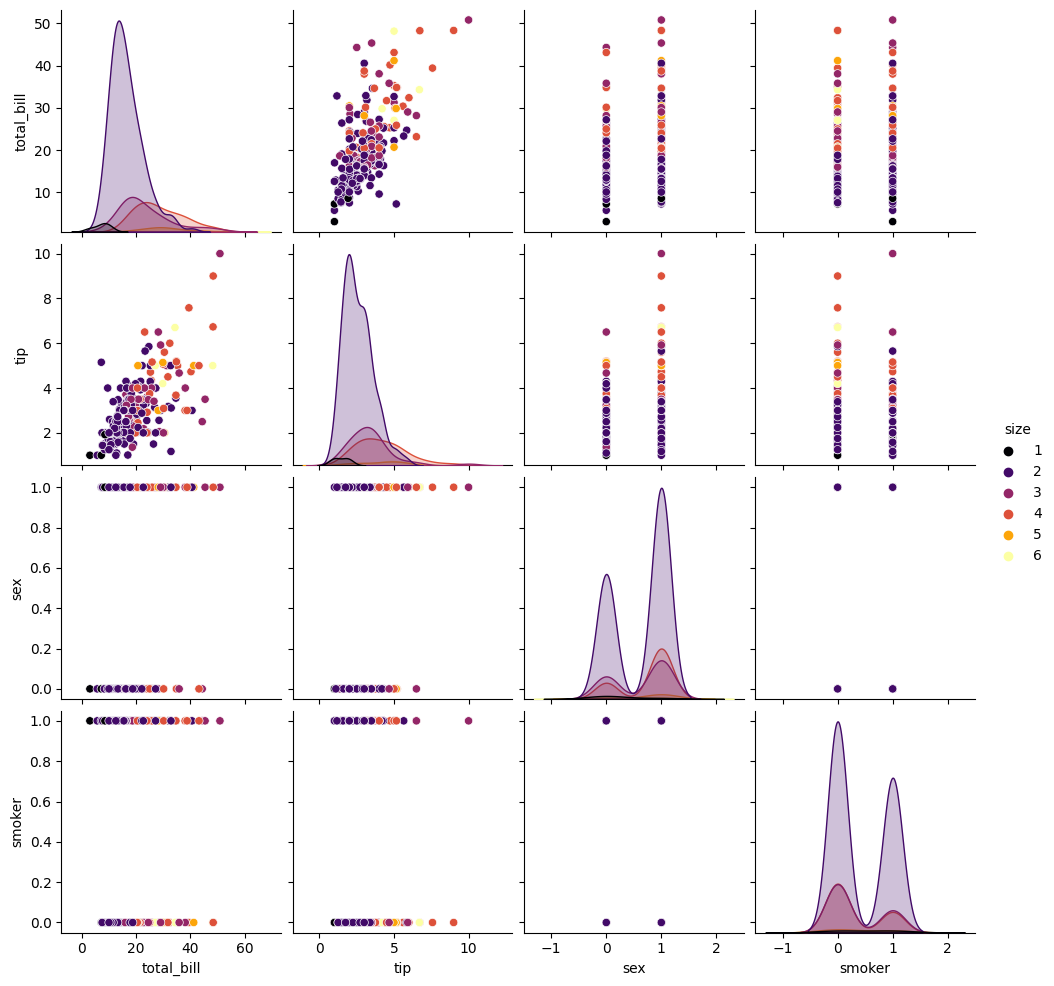

In [24]:
plt.figure(figsize=(5,5))
sns.pairplot(data=New_data, hue='size', palette='inferno')
plt.show()

In [25]:
X = New_data.drop("tip", axis=1)
y = New_data["tip"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
X_new_test = pd.DataFrame(X_new_test)

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Example data
x = sm.add_constant(X)  # Add constant for intercept in the model
Y = y

# Fit a linear regression model
model = sm.OLS(Y, x).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)

# Print the test statistic and p-value
print(f"Rainbow Test Statistic: {rainbow_stat:.3f}")
print(f"P-Value: {rainbow_p_value:.3f}")

# Interpretation
if rainbow_p_value < 0.05:
    print("Linearity assumption may be violated (reject null hypothesis).")
else:
    print("No evidence to reject linearity assumption (fail to reject null hypothesis).")


Rainbow Test Statistic: 1.223
P-Value: 0.136
No evidence to reject linearity assumption (fail to reject null hypothesis).


#### Lasso Regression 

In [29]:
LaR = Lasso(alpha=0.2)
LaR.fit(X_new_train, y_new_train)

y_pred_LaR = LaR.predict(X_new_test)
print('Lasso R2:' , r2_score(y_new_test, y_pred_LaR))

Lasso R2: 0.5133143275545545


......

In [30]:
y_pred_LaR

array([2.9840608 , 2.14448561, 3.59944318, 3.70125592, 2.46587955,
       2.83742006, 3.63900542, 2.42637013, 2.60112333, 2.64671113,
       2.86781192, 2.29644492, 2.28732736, 2.57832944, 2.11525985,
       3.02240411, 3.02772269, 3.11778499, 2.72800936, 4.99174395,
       3.30616171, 3.17512322, 2.5654129 , 2.20374974, 3.19411813,
       2.3663462 , 2.25845509, 3.39890971, 2.98704716, 5.65008125,
       4.49868881, 2.06622656, 3.08734031, 3.01977123, 2.89551809,
       3.56373274, 2.39217928, 5.00962558, 2.47803629, 3.20060281,
       2.27669021, 2.58136862, 3.29785677, 2.39101318, 2.26377367,
       1.58340226, 2.28276858, 3.02620309, 2.05255023])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print("Mean Squared Error",mean_squared_error(y_new_test, y_pred_LaR))

Mean Squared Error 0.6083431447116322


....

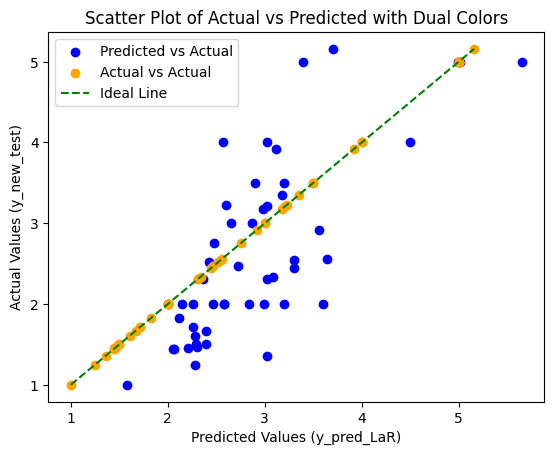

In [33]:
# Scatter plot for predicted values
plt.scatter(y_pred_LaR, y_new_test, color='blue', label='Predicted vs Actual')

# Scatter plot for actual values, using the same points but different colors to show distribution
plt.scatter(y_new_test, y_new_test, color='orange', label='Actual vs Actual')

# Add a diagonal line for reference (ideal case: y = x)
plt.plot([min(y_new_test), max(y_new_test)], [min(y_new_test), max(y_new_test)], color='green', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Predicted Values (y_pred_LaR)')
plt.ylabel('Actual Values (y_new_test)')
plt.title('Scatter Plot of Actual vs Predicted with Dual Colors')
plt.legend()

plt.show()


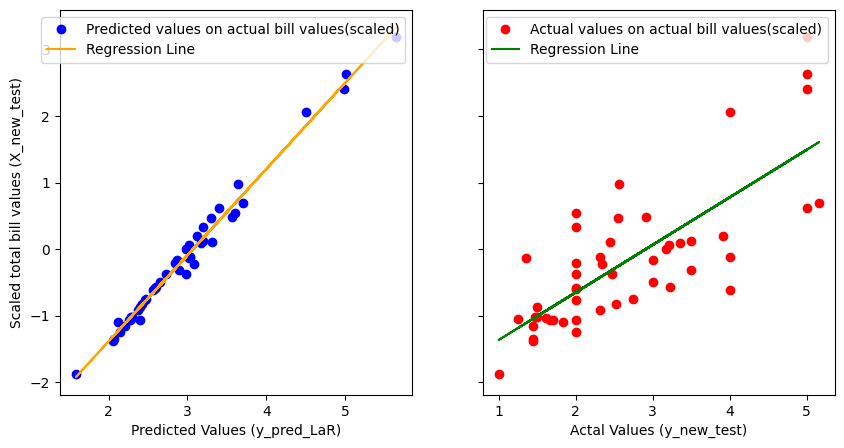

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
# Fit a regression line
slope1, intercept1 = np.polyfit(y_pred_LaR, X_new_test[0], 1)  # Linear fit (degree 1)

# Scatter plot for predicted vs actual values
ax1.scatter(y_pred_LaR, X_new_test[0], color='blue', label='Predicted values on actual bill values(scaled)')

# Plot the regression line
reg_line = slope1 * np.array(y_pred_LaR) + intercept1
ax1.plot(y_pred_LaR, reg_line, color='orange', label='Regression Line')

# Add labels and title
ax1.set_xlabel('Predicted Values (y_pred_LaR)')
ax1.set_ylabel('Scaled total bill values (X_new_test)')
ax1.legend()

slope2, intercept2 = np.polyfit(y_new_test, X_new_test[0], 1)  # Linear fit (degree 1)

# Scatter plot for predicted vs actual values
ax2.scatter(y_new_test, X_new_test[0], color='red', label='Actual values on actual bill values(scaled)')

# Plot the regression line
reg_line = slope2 * np.array(y_new_test) + intercept2
ax2.plot(y_new_test, reg_line, color='green', label='Regression Line')

# Add labels and title
ax2.set_xlabel('Actal Values (y_new_test)')
ax2.legend()

plt.show()
